<h1 style="Comic Sans MS; text-align: center; color: #FFC300">California Housing Prices: Regression ML problem</h1>
<h3 id="step1" style="font-family: Comic Sans MS; color: #68FF33">1. Problem statement and data collection</h3>
<p style="color: pink">We want to predict <em><b>median_house_value</b></em> based on all the available features in the dataset. The data pertains to the houses found in a given California district and some summary stats about them based on the 1990 census data. The data aren't cleaned so there are some preprocessing steps required. We shall undertake the following tasks to address this task:</p>
<ul style="color: pink">
    <li>perform EDA so we keep the variables that are strictly necessary and eliminate those that are not relevant or do not provide information.</li>
    <li>build, train and optimize a model using common metrics for evaluating it.</li>
</ul>

In [1]:
import pandas as pd

# Load and read data
total_data = pd.read_csv('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Projects/California-Housing-Prices/data/raw/housing.csv')
total_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Data Exploration</h3>

In [2]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


<p style="color: pink">Around 200 missing values in <b><em>total_bedrooms</em></b> variable</p>

In [3]:
total_data.dropna(inplace=True)

In [4]:
total_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 20433 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20433 non-null  float64
 1   latitude            20433 non-null  float64
 2   housing_median_age  20433 non-null  float64
 3   total_rooms         20433 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20433 non-null  float64
 6   households          20433 non-null  float64
 7   median_income       20433 non-null  float64
 8   median_house_value  20433 non-null  float64
 9   ocean_proximity     20433 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.7+ MB


In [5]:
from sklearn.model_selection import train_test_split

X = total_data.drop('median_house_value', axis=1)
y = total_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Joining X_train and y_train
train_data = X_train.join(y_train)
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,4412.0,924.0,2698.0,891.0,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,1036.0,181.0,620.0,174.0,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,3891.0,848.0,1848.0,759.0,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,2362.0,949.0,2759.0,894.0,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,1839.0,392.0,1302.0,404.0,3.5500,NEAR OCEAN,214600.0


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

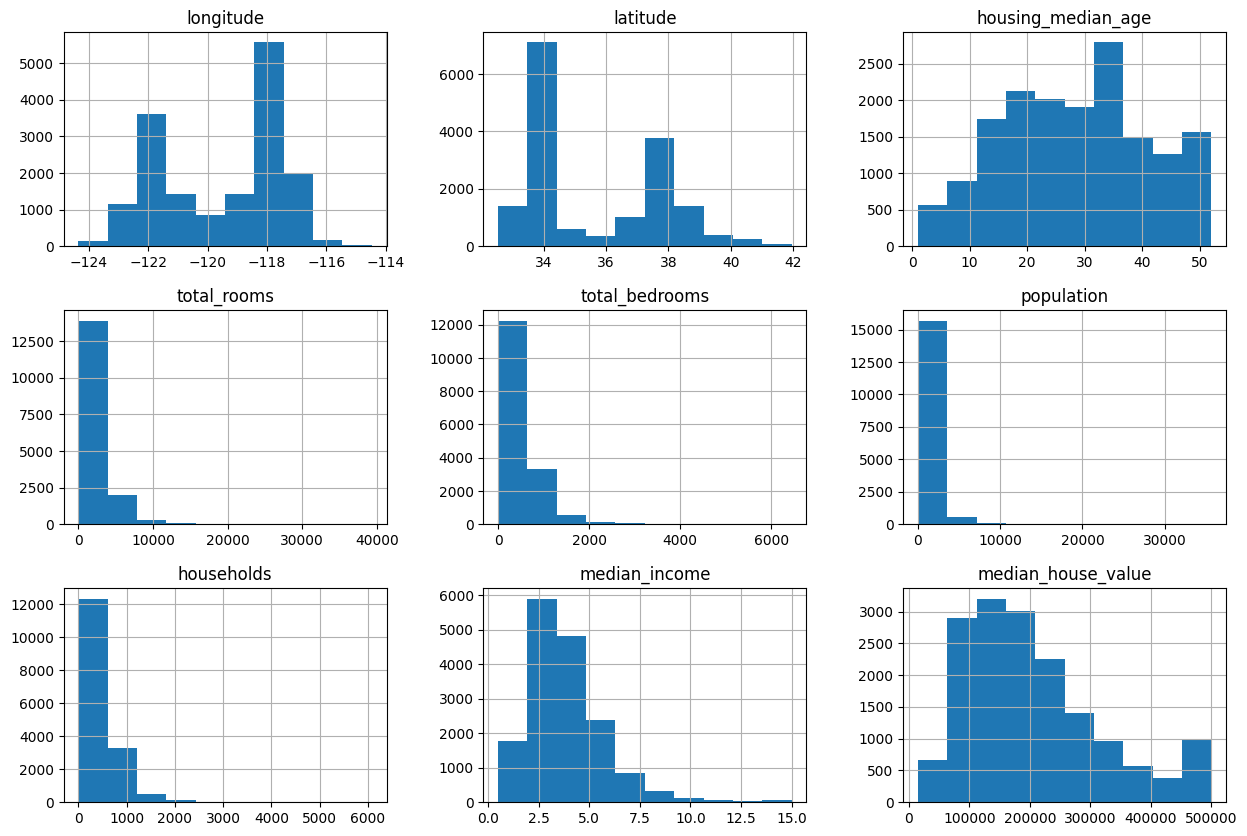

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the correlation matrix of the train data to get an idea of the relationships between the features, multiple histograms for the distribution of individual features
train_data.hist(figsize=(15, 10))

<Axes: >

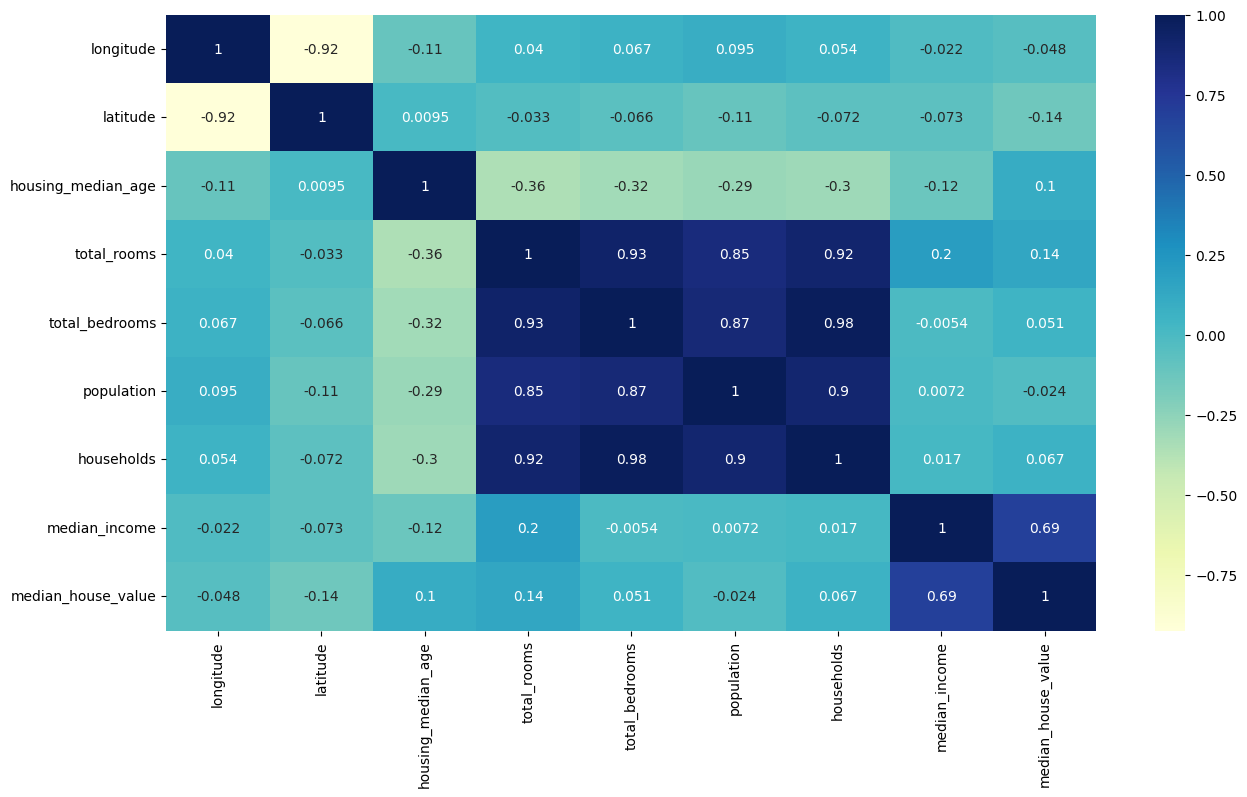

In [8]:
# Correlation matrix of the train data except the categorical feature 'ocean_proximity'
corr_matrix = train_data.drop('ocean_proximity', axis=1).corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu')

<h3 id="step2" style="font-family: Comic Sans MS; color: #68FF33">2. Data Pre-processing</h3>
<p style="color: pink"> From the histograms we see the data is skewed, it's not a nice gaussian bell curve so we are going to take the logarithm for those features and see what the distribution looks like</p>

In [9]:
# Take the logaritm of the features to see the distribution of the data
import numpy as np

train_data['total_rooms'] = np.log(train_data['total_rooms'] + 1)
train_data['total_bedrooms'] = np.log(train_data['total_bedrooms'] + 1)
train_data['population'] = np.log(train_data['population'] + 1)
train_data['households'] = np.log(train_data['households'] + 1)

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

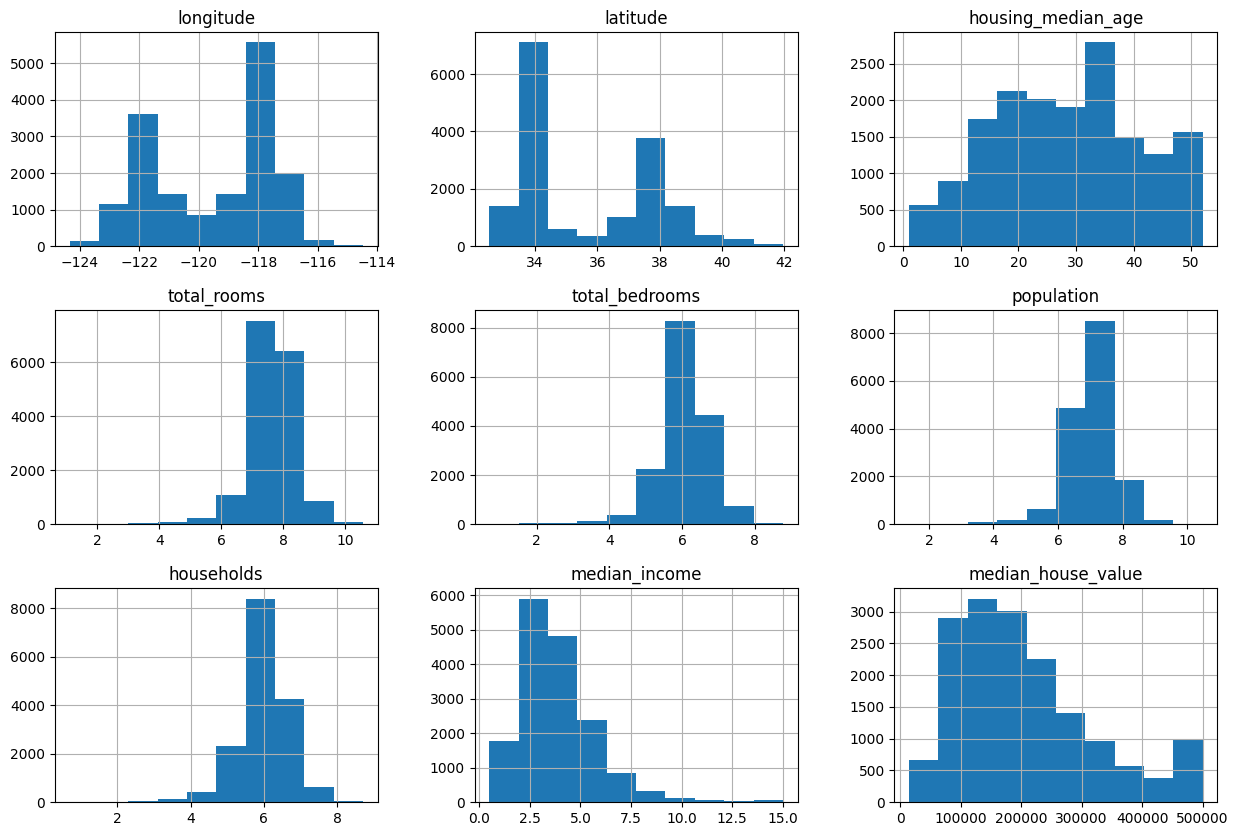

In [10]:
train_data.hist(figsize=(15, 10))

<p style="color: pink">Now it looks more like a normal distribution. We've achived this by:</p>
<ul style="color: pink">
    <li>The transformation is np.log(x + 1), where x is the value in each cell of the specified column. This transformation is often used in data preprocessing to handle skewed data. By applying the log function, the large values in the dataset are scaled down and the small values are scaled up, reducing the skewness of the data.</li>
    <li>The +1 inside the log function is a common technique used to handle zero values. Since the log of zero is undefined, adding 1 to each value ensures that the log function is applied smoothly without causing any mathematical errors.</li>
    <li>After the transformation, the original columns in the DataFrame are replaced with their transformed values. This is a common operation in machine learning preprocessing, where you might want to normalize or standardize your data to make it easier for a model to learn.</li>
</ul>

In [11]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,<1H OCEAN,227600.0
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,INLAND,110400.0
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,INLAND,248100.0
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,<1H OCEAN,305600.0
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,NEAR OCEAN,214600.0


In [12]:
train_data.ocean_proximity.value_counts()

ocean_proximity
<1H OCEAN     7231
INLAND        5156
NEAR OCEAN    2114
NEAR BAY      1842
ISLAND           3
Name: count, dtype: int64

In [13]:
pd.get_dummies(train_data['ocean_proximity'])

,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,True,False,False,False,False
2057,False,True,False,False,False
6453,False,True,False,False,False
4619,True,False,False,False,False
15266,False,False,False,False,True
...,...,...,...,...,...
11397,True,False,False,False,False
12081,True,False,False,False,False
5447,True,False,False,False,False
866,False,False,False,True,False


In [14]:
train_data = train_data.join(pd.get_dummies(train_data['ocean_proximity'])).drop('ocean_proximity', axis=1)

In [15]:
train_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
17727,-121.80,37.32,14.0,8.392310,6.829794,7.900637,6.793466,4.7027,227600.0,True,False,False,False,False
2057,-119.63,36.64,33.0,6.944087,5.204007,6.431331,5.164786,3.4107,110400.0,False,True,False,False,False
6453,-118.06,34.12,25.0,8.266678,6.744059,7.522400,6.633318,3.6639,248100.0,False,True,False,False,False
4619,-118.31,34.07,28.0,7.767687,6.856462,7.922986,6.796824,2.2364,305600.0,True,False,False,False,False
15266,-117.27,33.04,27.0,7.517521,5.973810,7.172425,6.003887,3.5500,214600.0,False,False,False,False,True


<Axes: >

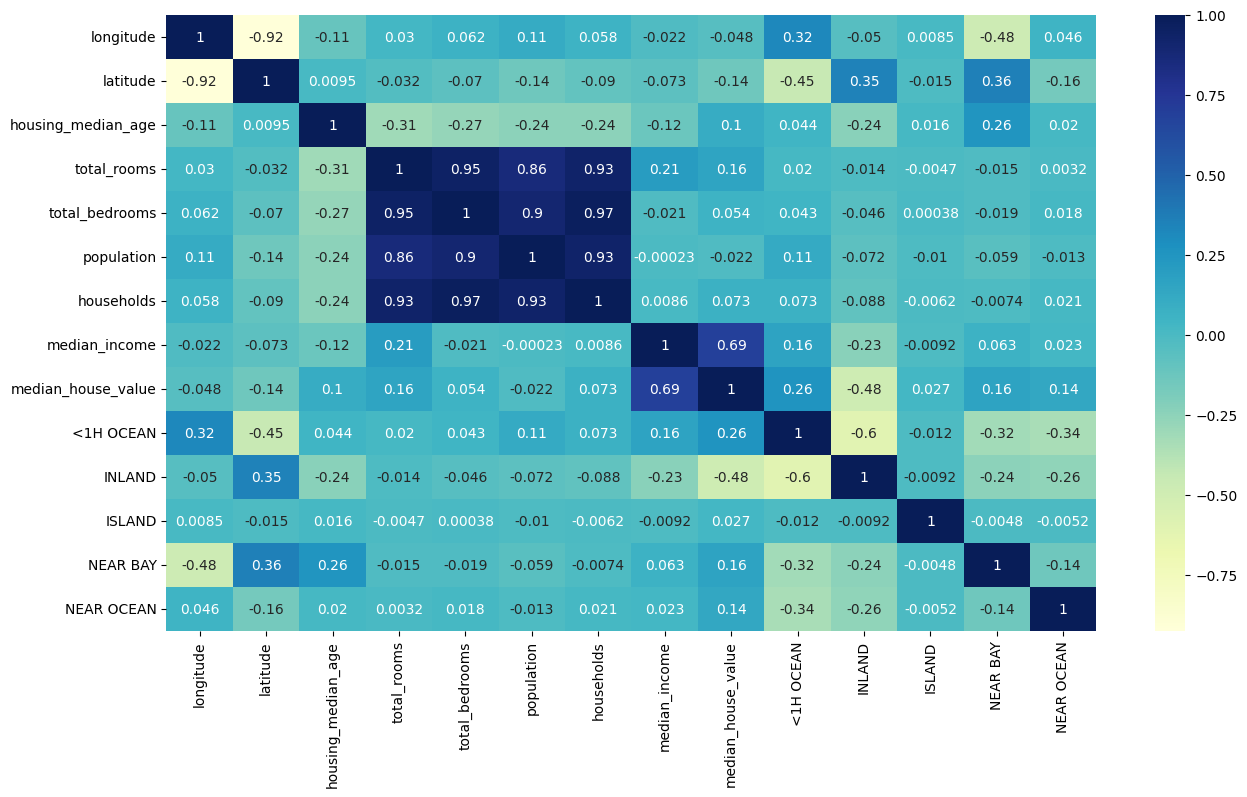

In [16]:
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<p style="color: pink">Now we can see how these new features correlate with the targe variable and we can see for example there is negative correlation between INLAND so if you are inland you pay way less for your house or the median price in the block is lower if it's not inland, same is true for less than one hour away from the ocean it's usually a higher price.<br>
<br>Now before we go to feature engineering let's see how the proximity and how the position of the individual blocks influences the pricing:
</p>

<Axes: xlabel='latitude', ylabel='longitude'>

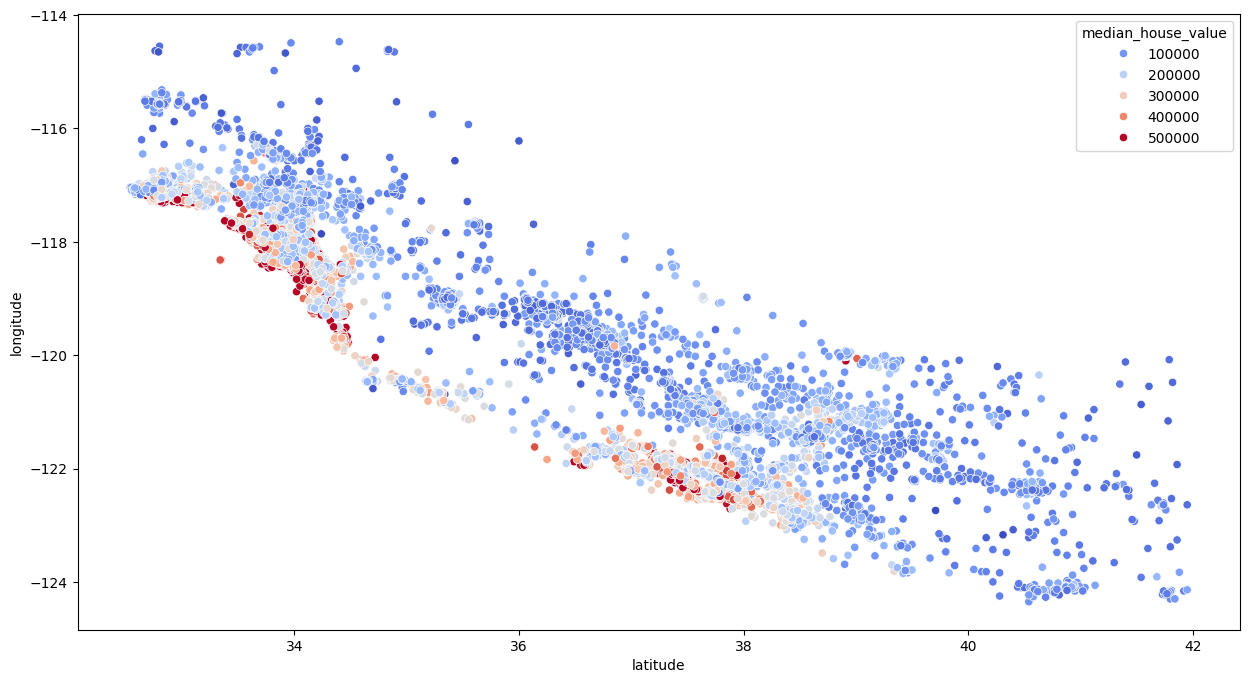

In [17]:
plt.figure(figsize=(15, 8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue='median_house_value', palette='coolwarm')

<p>
median house value so the more red it gets the more expensive the houses, and the more blue it is the less expensive.
The red ones are the coast houses while the blues represent the inlands 
</p>

<Axes: >

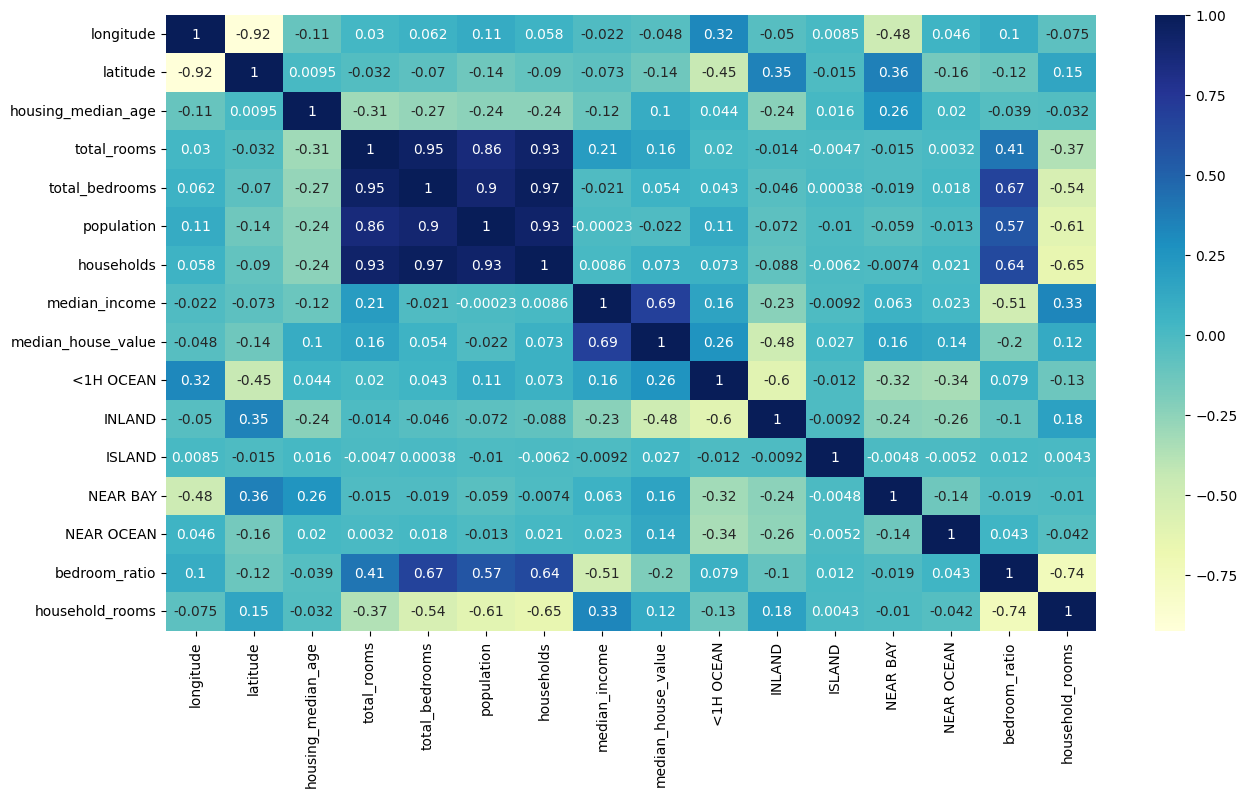

In [18]:
# Create a new feature 
train_data['bedroom_ratio'] = train_data['total_bedrooms'] / train_data['total_rooms'] # Bedroom ratio per room  
train_data['household_rooms'] = train_data['total_rooms'] / train_data['households'] # Number of rooms per household
plt.figure(figsize=(15, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='YlGnBu')

<p>Now we can see the recently created features have a significant correlation with the target variable, for example the bedroom_ration has a negative correlation with the median_house_value per block and the households_rooms are more interesting with the target variable
</p>

In [19]:
# We did the split before the EDA, so we need to do the EDA again with the test data
from sklearn.linear_model import LinearRegression

X_train, y_train = train_data.drop('median_house_value', axis=1), train_data['median_house_value']

lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

<p>Please note we haven't scaled the features before running the linear regression model, but we will do so, we just know want to see how well the model performs...so for the randforests we will perform hyperparam tunning and so on</p>

In [20]:
test_data = X_test.join(y_test)
test_data['total_rooms'] = np.log(test_data['total_rooms'] + 1)
test_data['total_bedrooms'] = np.log(test_data['total_bedrooms'] + 1)
test_data['population'] = np.log(test_data['population'] + 1)
test_data['households'] = np.log(test_data['households'] + 1)
test_data = test_data.join(pd.get_dummies(test_data['ocean_proximity'])).drop('ocean_proximity', axis=1)
test_data['bedroom_ratio'] = test_data['total_bedrooms'] / test_data['total_rooms'] # Bedroom ratio per room
test_data['household_rooms'] = test_data['total_rooms'] / test_data['households'] # Number of rooms per household

In [21]:
X_test, y_test = test_data.drop('median_house_value', axis=1), test_data['median_house_value']

In [22]:
lin_reg.score(X_test, y_test)

0.6687407117584973

<h3 id="step4" style="font-family: Comic Sans MS; color: #68FF33">Random Forests model</h3>

In [23]:
from sklearn.ensemble import RandomForestRegressor

forest = RandomForestRegressor()

forest.fit(X_train, y_train)

RandomForestRegressor()

In [24]:
forest.score(X_test, y_test)

0.8189778861544175

<span style="color: pink">Not a bad score but let's see if we can get it to even higher accuracy</span>

In [32]:
from sklearn.model_selection import GridSearchCV

forest = RandomForestRegressor() # We need to create a new instance of the model

param_grid = {
    'n_estimators': [30, 50, 100],
    'max_features': [8, 12, 20],
    'min_samples_split': [2, 4, 6, 8],
}

grid_search = GridSearchCV(forest, param_grid, cv=5, scoring='neg_mean_squared_error', return_train_score=True)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid={'max_features': [8, 12, 20],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [30, 50, 100]},
             return_train_score=True, scoring='neg_mean_squared_error')

In [33]:
# The best hyperparameters
print(f"The best hyperparameters are: {grid_search.best_params_}")

The best hyperparameters are: {'max_features': 12, 'min_samples_split': 6, 'n_estimators': 100}


In [34]:
best_forest = grid_search.best_estimator_

best_forest.score(X_test, y_test)

0.8202593978701295

<div class="alert alert-block alert-success">
<b>First attempt:</b> We used 'n_estimators': [3, 10, 30] and 'max_features': [2, 4, 6, 8], being the best hyperparams {'max_features': 8, 'n_estimators': 30}. With this we obtain 0.812611. The training time was 2 minutes.
<br><b>Second attempt:</b> We used 'n_estimators': [30, 50, 100], 'max_features': [8, 12, 20], and 'min_samples_split': [2, 4, 6, 8], being the best hyperparams {'max_features': 12, 'min_samples_split': 6, 'n_estimators': 100}. With these we notice a 1% improvement which is good but improrvable. Here however the training time was 20 minutes, much more compared to the first attempt.
</div>

In [ ]:
from pickle import dump
dump(best_forest, open('C:/Users/Jorge Payà/Desktop/4Geeks/DSML Bootcamp/Projects/California-Housing-Prices/models/best_forest.pkl', 'wb'))